In [46]:
#Loading Initial Packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### This section of the notebok I'm going to be using regression based supervised learning on the California School Dataset

In [131]:
#reading in data
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")

### The variables in the dataset

distcod - district code (dropped)

county - county (dropped)

district - district (dropped)

grspan - grade span of district (dropped)

enrltot - total enrollment

teachers -number of teachers

calwpct - percent qualifying for CalWorks

mealpct - percent qualifying for reduced-price lunch

computer - number of computers

testscr - average test score (read.scr+math.scr)/2

compstu - computer per student

expnstu -expenditure per student

str -student teacher ratio

avginc -district average income

elpct -percent of English learners

readscr - average reading score (dropped)

mathscr - average math score (dropped)

#### The dataset contains variables capturing qualities of a school and the test scores of its students. 

In [132]:
#reading in data
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
#dropping english and math score as that is already captured by the testscr vairable
df = df.drop(df.columns[[16, 17]], axis=1)
#droppping first 6 collumns because of the large ammount of variance on the categorical variable. It's impossilbe on one hot encode all of them
df = df.iloc[:, 5:]
df

,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677
...,...,...,...,...,...,...,...,...,...,...,...
415,984,59.730000,0.101600,3.556900,195,704.300049,0.198171,7290.338867,16.474134,28.716999,5.995935
416,3724,208.479996,1.074100,1.503800,721,706.750000,0.193609,5741.462891,17.862625,41.734108,4.726101
417,441,20.150000,3.563500,37.193802,45,645.000000,0.102041,4402.831543,21.885857,23.733000,24.263039
418,101,5.000000,11.881200,59.405899,14,672.200012,0.138614,4776.336426,20.200001,9.952000,2.970297


In [90]:
#exploring depedent variable charcteristics
df.testscr.describe()

count    420.000000
mean     654.156548
std       19.053348
min      605.550049
25%      640.049988
50%      654.449982
75%      666.662506
max      706.750000
Name: testscr, dtype: float64

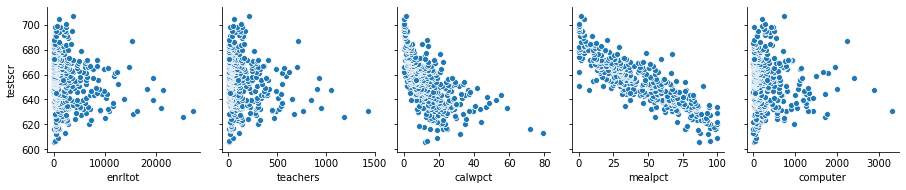

In [91]:
#visualizing the leationships between iv's and dv's
sns.pairplot(data=df,
                  y_vars=['testscr'],
                  x_vars=['enrltot', 'teachers', 'calwpct','mealpct', 'computer'])                  

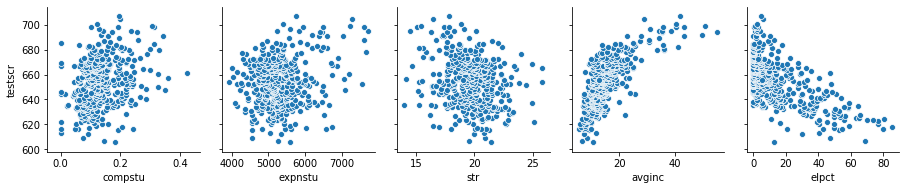

In [92]:
#visualizing the leationships between iv's and dv's
sns.pairplot(data=df,
                  y_vars=['testscr'],
                  x_vars=['compstu', 'expnstu', 'str','avginc','elpct'])

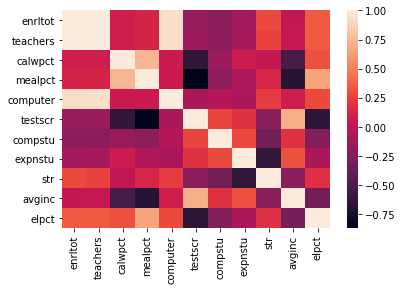

In [80]:
#heatmap of data for different perspective
sns.heatmap(df.corr())

### Train-testing and using supervised learning

In [93]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
#applying values to cross validation settings
kfold = KFold(n_splits=5) 
skfold = StratifiedKFold(n_splits=5,shuffle=True)
rkf = RepeatedKFold(n_splits=5, n_repeats=10,random_state=1)

In [145]:
y = df['testscr']
X = df.loc[:, df.columns != "testscr"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn import preprocessing
#transforming data with standardscaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### KNN Regressor

In [163]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors = 3) 
knn.fit(X_train_scaled,y_train)


print("Training set score: {:.2f}".format(knn.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test_scaled, y_test)))
print("Mean Cross-Validation: Kfold R^2:  {:.2f}".format(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=kfold))))
print("Mean Cross-Validation: Stratified Repeated kfold:  {:.2f}".format(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=rkf))))

Training set score: 0.85
Test set score: 0.75
Mean Cross-Validation: Kfold R^2:  0.70
Mean Cross-Validation: Stratified Repeated kfold:  0.69


### Using Cross Validation to hyptertune parameters

In [164]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
knn_param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)} 
knn_grid = GridSearchCV(knn_pipe, knn_param_grid, cv=kfold).fit(X_train_scaled, y_train)

print("KNN for REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(knn_grid.score(X_test_scaled, y_test)))
#print("Best Cross-Validation Score: {:.2f}".format(knn_grid.best_score_))
print("Best Parameter: {}".format(knn_grid.best_params_))

KNN for REGRESSION (SCALED DATA)
Test set Score: 0.80
Best Parameter: {'kneighborsregressor__n_neighbors': 8}


### Linear Regression (OLS)

In [166]:
lr = LinearRegression().fit(X_train_scaled, y_train)
print("Linear Regression Training set score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Linear Regression Ttest set score: {:.2f}".format(lr.score(X_test_scaled, y_test)))

Linear Regression Training set score: 0.80
Linear Regression Ttest set score: 0.83


### Ridge Linear Regression

In [169]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Ridge Regression Training set score: {:.2f}".format(ridge.score(X_train_scaled, y_train)))
print("Ridge Regression Test set score: {:.2f}".format(ridge.score(X_test_scaled, y_test)))

Ridge Regression Training set score: 0.80
Ridge Regression Test set score: 0.83


### Using Cross Validation to hyptertune parameters

In [170]:
ridge_pipe = make_pipeline(StandardScaler(), Ridge())
ridge_param_grid = {'ridge__alpha': np.linspace(0.1, 100.1, 1)}
ridge_grid = GridSearchCV(ridge_pipe, ridge_param_grid, cv=kfold).fit(X_train_scaled, y_train)

print("RIDGE REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(ridge_grid.score(X_test_scaled, y_test)))
#print("Best Cross-Validation Score: {:.2f}".format(ridge_grid.best_score_))
print("Best Parameter: {}".format(ridge_grid.best_params_))

RIDGE REGRESSION (SCALED DATA)
Test set Score: 0.83
Best Parameter: {'ridge__alpha': 0.1}


### Lasso Linear Regression

In [174]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train_scaled, y_train)
print("Lasso Regression Training set score: {:.2f}".format(lasso.score(X_train_scaled, y_train)))
print("Lasso Regression Test set score: {:.2f}".format(lasso.score(X_test_scaled, y_test)))

Lasso Regression Training set score: 0.79
Lasso Regression Test set score: 0.82


### Using Cross Validation to hyptertune parameters


In [175]:
lasso_pipe = make_pipeline(StandardScaler(), Lasso())
lasso_param_grid = {'lasso__alpha': np.linspace(0.1, 100.0, 1)}
lasso_grid = GridSearchCV(lasso_pipe, lasso_param_grid, cv=kfold).fit(X_train_scaled, y_train)

print("LASSO REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(lasso_grid.score(X_test_scaled, y_test)))
#print("Best Cross-Validation Score: {:.2f}".format(lasso_grid.best_score_))
print("Best Parameter: {}".format(lasso_grid.best_params_))

LASSO REGRESSION (SCALED DATA)
Test set Score: 0.83
Best Parameter: {'lasso__alpha': 0.1}


### Support Vector Machine

In [224]:
from sklearn.svm import SVR
clf = SVR()
clf.fit(X_train_scaled, y_train)
print("SVM Regression Training set score: {:.2f}".format(clf.score(X_train_scaled, y_train)))
print("SVM Regression Test set score: {:.2f}".format(clf.score(X_test_scaled, y_test)))

SVM Regression Training set score: 0.60
SVM Regression Test set score: 0.63


### Using Cross Validation to hyptertune parameters

In [227]:
svm_steps = [('scaler', StandardScaler()), ('SVM', SVR())]
parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}
svm_pipeline = Pipeline(svm_steps)
svm_grid = GridSearchCV(svm_pipeline, param_grid=parameteres, cv=5)
svm_grid.fit(X_train_scaled,y_train)
print("Test set score: {:.2f}".format(svm_grid.score(X_test_scaled,y_test)))
print("Best Parameter: {}".format(svm_grid.best_params_))

Test set score: 0.80
Best Parameter: {'SVM__C': 100, 'SVM__gamma': 0.01}


### Decision Tree

In [210]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=6)
dt.fit(X_train_scaled, y_train)
print("training test score: {:.2f}".format(dt.score(X_train_scaled,y_train)))
print("Test set score: {:.2f}".format(dt.score(X_test_scaled, y_test)))
print("Mean Cross-Validation: Kfold:  {:.2f}".format(np.mean(cross_val_score(dt , X_train_scaled, y_train, cv=kfold))))
print("Mean Cross-Validation: Stratified Repeated kfold:  {:.2f}".format(np.mean(cross_val_score(dt, X_train_scaled, y_train, cv=rkf))))

training test score: 0.94
Test set score: 0.68
Mean Cross-Validation: Kfold:  0.66
Mean Cross-Validation: Stratified Repeated kfold:  0.62


### Using Cross Validation to hyptertune parameters

In [235]:
dt_steps = [('scaler', StandardScaler()), ('DT', DecisionTreeRegressor())]
parameteres = {'DT__max_depth':range(1,50),'DT__min_samples_leaf':range(1,50),'DT__criterion':['mse', 'friedman_mse', 'mae']}
dt_pipeline = Pipeline(dt_steps)
dt_grid = GridSearchCV(dt_pipeline, param_grid=parameteres, cv=5)
dt_grid.fit(X_train_scaled,y_train)
print("Test set score: {:.2f}".format(dt_grid.score(X_test_scaled,y_test)))
print("Best Parameter: {}".format(dt_grid.best_params_))

Test set score: 0.67
Best Parameter: {'DT__criterion': 'friedman_mse', 'DT__max_depth': 6, 'DT__min_samples_leaf': 5}


### Random Forest

In [215]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200)
rf.fit(X_train,y_train)

rf.fit(X_train_scaled, y_train)
print("training test score: {:.2f}".format(rf.score(X_train_scaled,y_train)))
print("Test set score: {:.2f}".format(rf.score(X_test_scaled, y_test)))
print("Mean Cross-Validation: Kfold:  {:.2f}".format(np.mean(cross_val_score(rf, X_train_scaled, y_train, cv=kfold))))
print("Mean Cross-Validation: Stratified Repeated kfold:  {:.2f}".format(np.mean(cross_val_score(rf, X_train_scaled, y_train, cv=rkf))))

training test score: 0.97
Test set score: 0.81
Mean Cross-Validation: Kfold:  0.77
Mean Cross-Validation: Stratified Repeated kfold:  0.77


### Using Cross Validation to hyptertune parameters

In [244]:
from sklearn.ensemble import RandomForestRegressor

rf_steps = [('scaler', StandardScaler()), ('RF', RandomForestRegressor())]
parameteres = {'RF__max_depth':range(1,10),'RF__n_estimators':range(1,10),
               'RF__max_features':range(1,5),'RF__min_samples_leaf':range(1,5),
               'RF__criterion':['mse', 'friedman_mse', 'mae']}
rf_pipeline = Pipeline(rf_steps)
rf_grid = GridSearchCV(rf_pipeline, param_grid=parameteres, cv=5)
rf_grid.fit(X_train_scaled,y_train)
print("Test set score: {:.2f}".format(rf_grid.score(X_test_scaled,y_test)))
print("Best Parameter: {}".format(rf_grid.best_params_))

Test set score: 0.82
Best Parameter: {'RF__criterion': 'friedman_mse', 'RF__max_depth': 9, 'RF__max_features': 3, 'RF__min_samples_leaf': 1, 'RF__n_estimators': 8}
